In [1]:
import tensorflow as tf
pathData = 'data/'

-----------------------------------------------

## 1. Sum in Tensorflow

**We want here to introduce Tensorflow; to do so, we will start with a very simple example of operation implementation using the framework. Let's try a sum between two numbers.**

In [2]:
## Sum in Tensorflow

a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
x = tf.add(a, b, name='Sum')

with tf.Session() as sess:
    writer = tf.summary.FileWriter(pathData + 'summaries/Sum',sess.graph)
    print('Value of the Sum : ' + str(sess.run(x)))
# close the writer when you're done using it
writer.close()

Value of the Sum : 5


**Run that command on a cmd box to launch TensorBoard :**

*tensorboard --logdir = mypath/graphs*

where "mypath" contains your current path.

**Then, you cain visualize the graph at the address they give you :**

*Starting TensorBoard b'54' at http://...*




------------------------------------

## 2. Linear Regression in Tensorflow

**This part contains code that demonstrates linear regression.**

In [3]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import math

%matplotlib inline
import pylab

To reset a session that has already runned.

In [4]:
sess = None
def resetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

We want to generate random values X, and then Y, such that Y = a * X + b

where a = 0.1 and b = 0.3

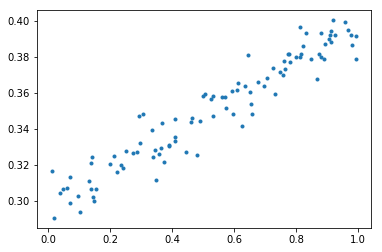

In [5]:
resetSession()

# Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_train, y_train, '.')

Then we create some fake evaluation data.

In [6]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

Now is the time to create the graph that will be stored on TensorBoard.

In [8]:
# Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_normal([1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Uncomment the following lines to see what W and b are.
print(W)
print(b)

<tf.Variable 'weights_1:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias_1:0' shape=(1,) dtype=float32_ref>


In [9]:
# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

Tensor("x:0", shape=(?,), dtype=float32)


At this point, we have:
* x_train: x input features
* y_train: observed y for each x that we will train on
* x_eval, y_eval: Same as above, but a smaller set that we will not train on, and instead evaluate our effectiveness. 

In [11]:
# Write the graph so we can look at it in TensorBoard
sw = tf.summary.FileWriter(pathData + 'summaries/linearReg', graph=tf.get_default_graph())

In [12]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print (y_label)

Tensor("y_label:0", shape=(?,), dtype=float32)


In [13]:
# Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000000000AAB6D68>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights_1/ApplyGradientDescent"
input: "^GradientDescent/update_bias_1/ApplyGradientDescent"



In [14]:
# Create an operation to initialize all the variables.
init = tf.global_variables_initializer()
print(init)
sess.run(init)

name: "init"
op: "NoOp"
input: "^weights/Assign"
input: "^bias/Assign"
input: "^weights_1/Assign"
input: "^bias_1/Assign"



In [15]:
# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([-2.01992941], dtype=float32), array([ 0.9097929], dtype=float32)]


In [16]:
# Uncomment these lines to test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([-5.14999533], dtype=float32)

In [17]:
# Calculate loss on the evaluation data before training
def eval_loss():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval_loss()

0.56337911

In [18]:
# Track of how loss changes, so we can visualize it in TensorBoard
tf.summary.scalar('loss', loss)
summary_op = tf.summary.merge_all()

In [19]:
# Perform training.
for step in range(201):
    # Run the training op; feed the training data into the graph
    summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
    sw.add_summary(summary_str, step)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
       print(step, sess.run([W, b]))

0 [array([-1.56609297], dtype=float32), array([ 1.42887223], dtype=float32)]
20 [array([-0.36534959], dtype=float32), array([ 0.56282705], dtype=float32)]
40 [array([-0.02444332], dtype=float32), array([ 0.36846334], dtype=float32)]
60 [array([ 0.06643513], dtype=float32), array([ 0.31665003], dtype=float32)]
80 [array([ 0.09066143], dtype=float32), array([ 0.3028377], dtype=float32)]
100 [array([ 0.09711964], dtype=float32), array([ 0.29915562], dtype=float32)]
120 [array([ 0.09884128], dtype=float32), array([ 0.29817405], dtype=float32)]
140 [array([ 0.09930019], dtype=float32), array([ 0.29791242], dtype=float32)]
160 [array([ 0.09942255], dtype=float32), array([ 0.29784265], dtype=float32)]
180 [array([ 0.09945516], dtype=float32), array([ 0.29782405], dtype=float32)]
200 [array([ 0.09946386], dtype=float32), array([ 0.29781911], dtype=float32)]


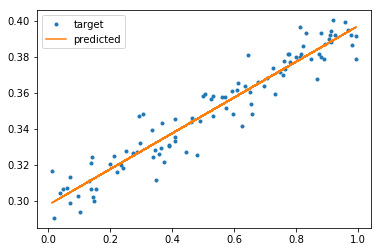

In [20]:
# Uncomment the following lines to plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), label="predicted")
pylab.legend()

In [21]:
# Check accuracy on eval data after training
eval_loss()

0.00011335383

Demonstrate saving and restoring a model

In [22]:
def predict(x_in):
    return sess.run(y, feed_dict={x: [x_in]})

In [23]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, './checkpoint.ckpt')

'./checkpoint.ckpt'

In [24]:
# Current prediction
predict(3)

array([ 0.59621072], dtype=float32)

In [25]:
# Reset the model by running the init op again
sess.run(init)

In [26]:
# Prediction after variables reinitialized
predict(3)

array([ 0.28048158], dtype=float32)

In [27]:
saver.restore(sess, './checkpoint.ckpt')

INFO:tensorflow:Restoring parameters from ./checkpoint.ckpt


In [28]:
# Predictions after variables restored
predict(3)

array([ 0.59621072], dtype=float32)

-----------------------------

### Quadratic Regression example in TensorFlow
**This program tries to predict the number of thefts from 
the number of fire in the city of Chicago**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILE = 'fire_theft.xls'


In [41]:
# read in data from the .xls file
data = pd.read_excel(pathData + DATA_FILE,index_col=None)
columns = data.columns
data = data.values
n_samples = data.shape[0]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [42]:
data[:5,:]

array([[  6.2,  29. ],
       [  9.5,  44. ],
       [ 10.5,  36. ],
       [  7.7,  37. ],
       [  8.6,  53. ]])

In [43]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

In [44]:
w = tf.Variable(0., name='weight1')
u = tf.Variable(0., name='weight2')
b = tf.Variable(0., name='bias')

**Question : how would you fill the following hole to create a tensor Y_predicted that is the quadratic function of X with w, u and b?**

Y_predicted = wX² + uX + b

In [47]:
Y_predicted = None
########### ENTER YOUR CODE HERE ##########
Y_predicted = W * x * x + u * x + b
#Y_predicted = tf.add(b, tf.add(tf.multiply(u, X), tf.multiply(w, tf.exp(X, 2))))
########### END OF THE CODE ############

In [48]:
loss = tf.square(Y - Y_predicted, name='loss')
loss = tf.reduce_mean(loss)

**Exercice : Fill the hole at the end of the cell to get the best values of w, u and b.**

In [53]:
# Using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

with tf.Session() as sess:
    # Initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    writer = tf.summary.FileWriter(pathData + 'summaries/quadReg', sess.graph)

    # Train the model
    for i in range(10): # train the model 100 times
        total_loss = 0
        for x,y in data:
            
            # Session runs train_op and fetch values of loss
            total_loss = 0
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        
        print('Epoch {0}: {1}'.format(i, (1.*total_loss)/n_samples))

    # close the writer when you're done using it
    writer.close() 

    # Output the values of w, u and b
    w_value, u_value, b_value = None, None, None
    ########## ENTER YOUR CODE HERE ###########
    w_value, u_value, b_value = sess.run([w, u, b])
    ######### END OF THE CODE ###########


InvalidArgumentError: Shape [-1] has negative dimensions
	 [[Node: x = Placeholder[dtype=DT_FLOAT, shape=[?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'x', defined at:
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-19022942cff9>", line 4, in <module>
    x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1] has negative dimensions
	 [[Node: x = Placeholder[dtype=DT_FLOAT, shape=[?], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


NameError: name 'w_value' is not defined

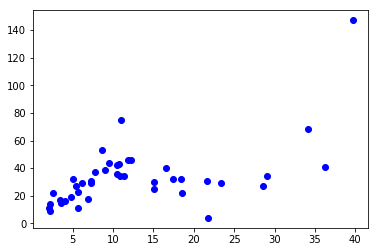

In [54]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * X * w_value + X * u_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

-------------------------

## 3. Logistic Regression using Tensorflow

**Now we want to create a shallow neural network that builds a logistic regression on our Insurance usecase of Week 2. How to do it?**

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import time

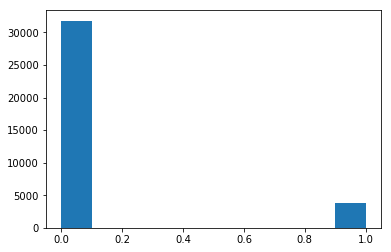

In [56]:
# read datasets
pathData = 'data/'

train = pd.read_csv(pathData+'trainDataset.csv')
Y = train['target'].as_matrix()
DF_X = train.drop('target',axis=1)

test =  pd.read_csv(pathData+'testDataset.csv')
Y_test = test['target'].as_matrix()
DF_X_test = test.drop('target',axis=1)

# right type
for c in DF_X.columns:
    if 'Cat_' in c:
        DF_X[c] = DF_X[c].astype(str)
        DF_X_test[c] = DF_X_test[c].astype(str)
    else:
        DF_X[c] = DF_X[c].astype(float)
        DF_X_test[c] = DF_X_test[c].astype(float)

# Categorization
treshold_ExLR = 0.75

Id_0_train = np.nonzero(Y<treshold_ExLR)[0]
Id_0_test = np.nonzero(Y_test<treshold_ExLR)[0]

Id_1_train = np.nonzero(Y>=treshold_ExLR)[0]
Id_1_test = np.nonzero(Y_test>=treshold_ExLR)[0]

Y[Id_0_train] = 0
Y[Id_1_train] = 1

Y_test[Id_0_test] = 0
Y_test[Id_1_test] = 1


# Encode categorical variables
DF_X = DF_X.copy()
DF_X_test = DF_X_test.copy()
for var in DF_X.columns:
    if str(DF_X[var].dtypes)=='object':
        le = LabelEncoder().fit(DF_X[var])
        DF_X[var] = le.transform(DF_X[var])
        DF_X_test[var] = le.transform(DF_X_test[var])
        
plt.hist(Y)
plt.show()

In [57]:
# Var importance using RF classifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0, n_estimators=100,\
                                  criterion='gini',max_depth=5)
VarImp = estimator.fit(DF_X,Y).feature_importances_
VarToUse = np.array(DF_X.columns.tolist())[np.argsort(-VarImp)[:5]]
print(VarToUse)


['Num_Car11' 'Num_Car15' 'Num_Car9' 'NumInsurance13' 'NumInsurance11']


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Sampling
IdRand = np.sort(np.random.permutation(np.arange(len(Y)))[:5000])
X_sample = DF_X[VarToUse].as_matrix()[IdRand]
Y_sample = Y[IdRand]
X_test = DF_X_test[VarToUse].as_matrix()

# Params for tensorflow model
learning_rate = 0.01
batch_size = 100
n_epochs = 200
n_features = X_sample.shape[1]

# Normalization
normX = MinMaxScaler()
normX.fit(X_sample)
X_sample_norm = normX.transform(X_sample)
X_test_norm = normX.transform(X_test)

** Here are the different steps to implement it : **

In [60]:
# Step 1: create placeholders for features and labels
# there are 2 classes in here, the output placeholder will be of dimension 1. 
XTensor = tf.placeholder(tf.float32, [None, n_features], name='X_placeholder') 
YTensor = tf.placeholder(tf.float32, [None, 1], name='Y_placeholder')

print("Tensor X : ")
print(XTensor)
print("Tensor Y : ")
print(YTensor)

Tensor X : 
Tensor("X_placeholder:0", shape=(?, 5), dtype=float32)
Tensor Y : 
Tensor("Y_placeholder:0", shape=(?, 1), dtype=float32)


In [61]:
# Step 2: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
W = tf.Variable(tf.random_normal(shape=[n_features, 1], stddev=1), name='weights')
b = tf.Variable(tf.random_normal([1, 1], stddev=1), name="bias")

print("Weight Tensor W :")
print(W)
print("Bias Tensor b :")
print(b)

Weight Tensor W :
<tf.Variable 'weights_2:0' shape=(5, 1) dtype=float32_ref>
Bias Tensor b :
<tf.Variable 'bias_3:0' shape=(1, 1) dtype=float32_ref>


In [62]:
# Step 3: build model 
# the model that returns the logits. 
# this logits will be computed through sigmoid tensorflow function
logits = tf.matmul(XTensor, W) + b 

print("Logits :")
print(logits)

Logits :
Tensor("add_5:0", shape=(?, 1), dtype=float32)


In [63]:
# Step 4: define loss function
# use binary cross entropy of logits as the loss function
entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=YTensor)
loss = tf.reduce_mean(entropy, name='loss') # computes the mean over all the examples in the batch

print("Entropy Tensor :")
print(entropy)
print()
print("Loss Tensor :")
print(loss)

Entropy Tensor :
Tensor("logistic_loss:0", shape=(?, 1), dtype=float32)

Loss Tensor :
Tensor("loss_2:0", shape=(), dtype=float32)


In [64]:
# Step 5: define training op
# using Adam optimizer with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

train_data = list(zip(X_sample_norm, Y_sample))
test_data = list(zip(X_test_norm, Y_test))
n_train = len(train_data)
n_test = len(test_data)

**Exercice : Complete the following cell. **

In [71]:
# Step 6: training and validation

with tf.Session() as sess :
    ## To visualize using TensorBoard
    writer = tf.summary.FileWriter('./summaries/logisticReg', sess.graph)
    
    start_time = time.time()
    
    ###################
    ## Train the model
    sess.run(tf.global_variables_initializer())
    n_batches = (1. * len(X_sample_norm)) /batch_size
    for i in range(n_epochs):
        total_loss = 0
        ## creation of batches :
        np.random.shuffle(train_data);
        mini_batches = [train_data[k:k + batch_size]
                        for k in range(0, n_train, batch_size)]
        
        j = 0
        for mini_batch in mini_batches:
            X_batch, Y_batch = zip(*mini_batch)
            Y_batch = np.vstack(Y_batch)
            
            ## Feed the placeholders to get the optimal variables W and b
            loss_batch = None
            ############# ENTER YOUR CODE HERE #############
            loss_batch = sess.run(loss, feed_dict({X: X_batch, Y: Y_batch})
            ############# END OF THE CODE ###########
            total_loss += loss_batch
        if i % 5 == 0:
            print('Average loss epoch {0}: {1}'.format(i, (1.*total_loss)/n_batches))
            j += 1
        
    print('Total time: {0} seconds'.format(time.time() - start_time))
    print('Optimization ... Done.')
    print
    
    
    ##################
    ## Test the model
    n_batches = int((1. * len(X_test_norm)) / batch_size)
    X_test_norm, Y_test2 = zip(*test_data)
    Y_test2 = np.vstack(Y_test2)
    
    ## Get the Logits
    total_correct_preds = 0
    logits_preds = sess.run(logits, feed_dict={XTensor: X_test_norm})
    logits_preds = 1 / (1 + np.exp(-logits_preds))
    tensorFlowPredTest = logits_preds.copy()
    
    ## Evaluate Prediction
    correct_preds = tf.equal(tf.round(logits_preds), Y_test2)
    total_correct_preds = 0
    ############# ENTER YOUR CODE HERE ##############
    total_correct_preds = tf.reduce_sum(correct_preds)
    ############# END OF THE CODE ################
    
    print('Accuracy {0}'.format((1.*total_correct_preds)/len(X_test_norm)))
    print()

sess.close()

SyntaxError: invalid syntax (<ipython-input-71-18f220e7c27b>, line 30)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_test, tpr_test, _ = roc_curve(\
                Y_test,tensorFlowPredTest)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test')
plt.legend(loc="lower right")
plt.show()


In [ ]:
tensorFlowPredTest